In [41]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Asegúrate de que el archivo se ha subido correctamente y verifica su nombre exacto
video_path = '/content/Video_Formateado.mp4'
# Cargar el video
cap = cv2.VideoCapture(video_path)


In [43]:
# Verificar si el video se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el video.")
    exit()

In [44]:
# Obtener información del video
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print("Frames por segundo:", fps)
print("Ancho:", width)
print("Alto:", height)

Frames por segundo: 60.0
Ancho: 1280
Alto: 720


In [45]:
# Inicializar el escritor de video para guardar el video con las coordenadas
output_path = 'video_con_coordenadas.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

In [46]:
# Inicializar lista para guardar las coordenadas
data = []

# Inicializar el identificador de frame
frame_id = 0

In [47]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_id += 1

    # Convertir el frame a espacio de color HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Definir el rango de colores para la pelota
    lower_color = np.array([130, 50, 50])  # Ajusta estos valores según el color de la pelota
    upper_color = np.array([170, 255, 255])  # Ajusta estos valores según el color de la pelota

    # Crear una máscara para los colores de la pelota
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Encontrar los contornos
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Suponer que la pelota es el contorno más grande
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Calcular el centro de la pelota
        cx = x + w // 2
        cy = y + h // 2

        # Dibujar un círculo en el centro de la pelota
        cv2.circle(frame, (cx, cy), 10, (0, 255, 0), -1)

        # Mostrar las coordenadas en el frame
        cv2.putText(frame, f'Frame: {frame_id}', (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame, f'Coords: ({cx}, {cy})', (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        # Guardar las coordenadas y el id del frame
        data.append({'frame_id': frame_id, 'x': cx, 'y': cy})

    # Escribir el frame con el círculo y el texto en el video de salida
    out.write(frame)

In [48]:

# Liberar el video y el escritor de video
cap.release()
out.release()

# Crear un DataFrame con las coordenadas
df = pd.DataFrame(data)

# Guardar la información en un archivo CSV
df.to_csv('coordenadas_pelota.csv', index=False)

print("Coordenadas guardadas en 'coordenadas_pelota.csv' y video con coordenadas en 'video_con_coordenadas.mp4'.")

Coordenadas guardadas en 'coordenadas_pelota.csv' y video con coordenadas en 'video_con_coordenadas.mp4'.


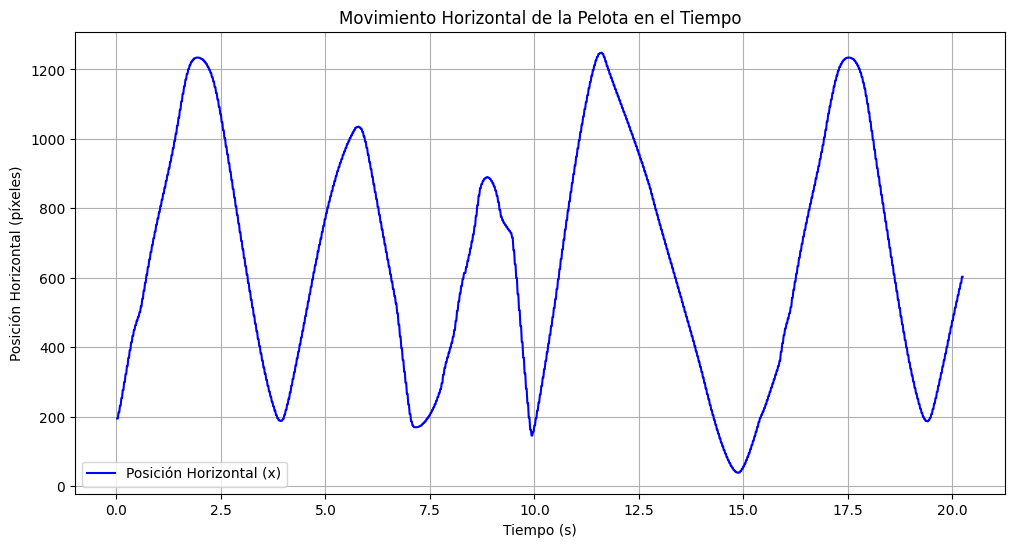

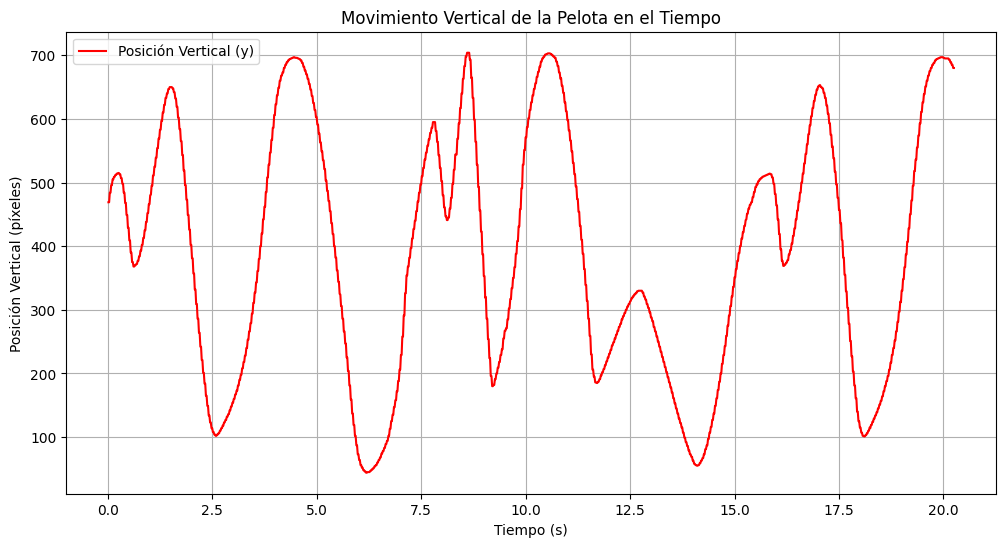

In [49]:
 #Crear una columna de tiempo en segundos basado en el frame_id y la tasa de cuadros por segundo (60 fps)
df['time'] = df['frame_id'] / 60.0

# Crear el gráfico para la posición horizontal (x)
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['x'], label='Posición Horizontal (x)', color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición Horizontal (píxeles)')
plt.title('Movimiento Horizontal de la Pelota en el Tiempo')
plt.legend()
plt.grid(True)
plt.savefig('movimiento_horizontal.png')
plt.show()

# Crear el gráfico para la posición vertical (y)
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['y'], label='Posición Vertical (y)', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición Vertical (píxeles)')
plt.title('Movimiento Vertical de la Pelota en el Tiempo')
plt.legend()
plt.grid(True)
plt.savefig('movimiento_vertical.png')
plt.show()

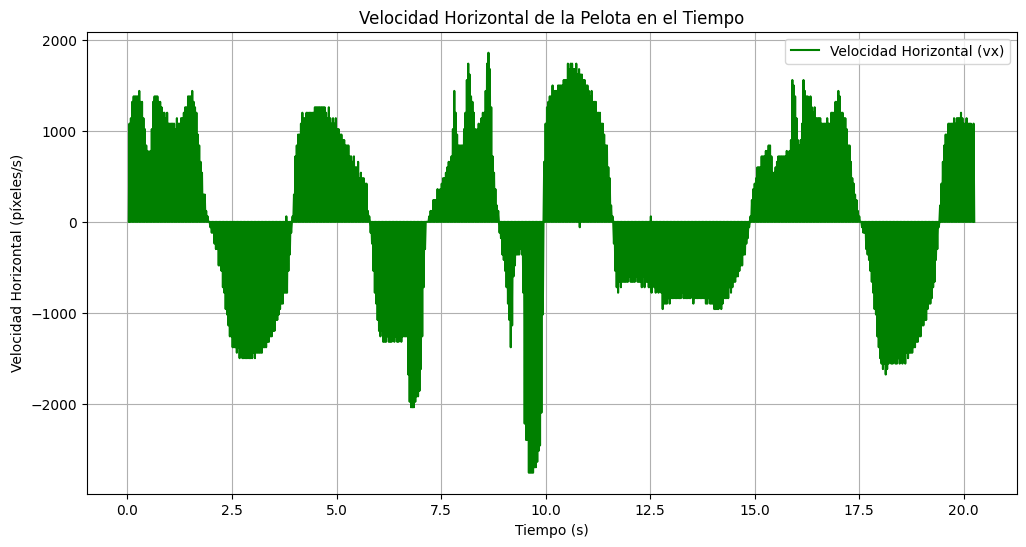

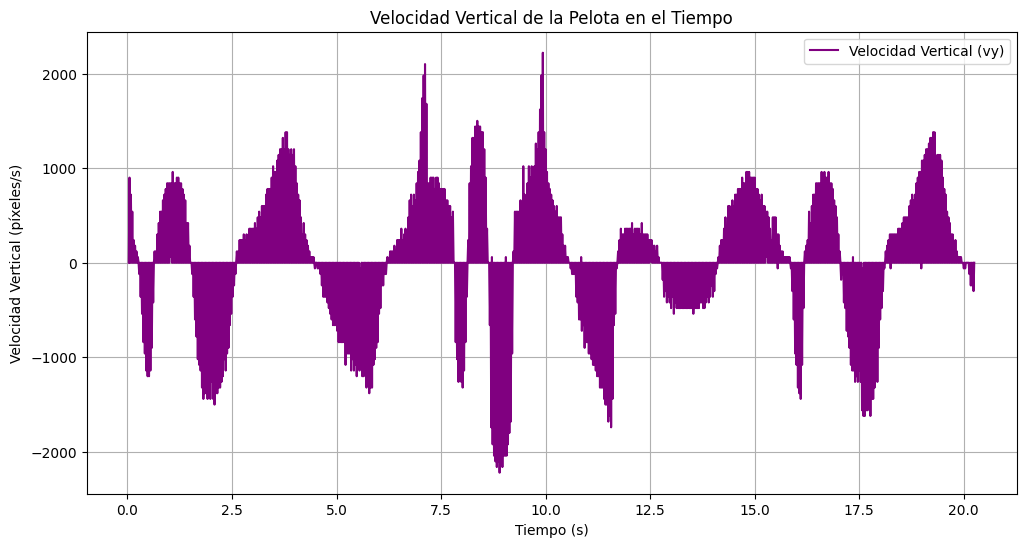

In [50]:
# Calcular la velocidad en cada punto (diferencias finitas)
df['vx'] = df['x'].diff() / df['time'].diff()
df['vy'] = df['y'].diff() / df['time'].diff()

# Crear el gráfico para la velocidad horizontal (vx)
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['vx'], label='Velocidad Horizontal (vx)', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Horizontal (píxeles/s)')
plt.title('Velocidad Horizontal de la Pelota en el Tiempo')
plt.legend()
plt.grid(True)
plt.savefig('velocidad_horizontal.png')
plt.show()

# Crear el gráfico para la velocidad vertical (vy)
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['vy'], label='Velocidad Vertical (vy)', color='purple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Vertical (píxeles/s)')
plt.title('Velocidad Vertical de la Pelota en el Tiempo')
plt.legend()
plt.grid(True)
plt.savefig('velocidad_vertical.png')
plt.show()

In [51]:
# Descargar los archivos generados
from google.colab import files
files.download('video_con_coordenadas.mp4')
files.download('coordenadas_pelota.csv')
files.download('movimiento_horizontal.png')
files.download('movimiento_vertical.png')
files.download('velocidad_horizontal.png')
files.download('velocidad_vertical.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>